transaction_id               False
apartment_id                 False
gu                           False
exclusive_use_area           False
year_of_completion           False
transaction_year_month       False
transaction_date             False
floor                        False
park_area_sum                False
day_care_babyTeacher_rate    False
transaction_real_price       False
cctv_num                     False
dtype: bool
x_train.shape :  (519599, 11)
(222686, 11)
(519599, 1)
(222686, 1)
-------------------표준화 : (요소값-평균) / 표준편차----------------
[[-0.70376554  0.95006347 -1.04297755 -1.16392688 -0.67495254 -0.42961219
  -0.22855072 -0.64401019  2.74662084 -0.6494858  -0.71618088]
 [ 0.39635299 -0.07198781  1.05387967  0.10521583 -0.00738213  0.28464301
  -0.98676611 -0.30618631 -0.13036944  2.88394274  2.83640459]]
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dens

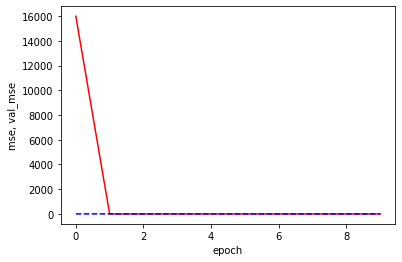

설명력 :  -0.08567252919232837


In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers 
from sklearn.metrics import r2_score
from tensorflow.python.keras.callbacks import TensorBoard
from sklearn.preprocessing._data import MinMaxScaler, minmax_scale,\
    StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV

df = pd.read_csv('./sample_data/train_add_cctv.csv')
print(df.isnull().any())

dataset = df.values
x = dataset[:, [0,1,2,3,4,5,6,7,8,9,11]]
x = StandardScaler().fit_transform(x)

y = dataset[:, [10]]
y = StandardScaler().fit_transform(y)
#print(x[100])
#print(y[100])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print('x_train.shape : ',x_train.shape) 
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape) 



print('-------------------표준화 : (요소값-평균) / 표준편차----------------')

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
print(x_train[:2])
#x_train = RobustScaler().fit_transform(x_train)
#x_test = RobustScaler().fit_transform(x_test)

def build_model():
    model = Sequential()
    model.add(Dense(128, activation='linear', input_shape=(x_train.shape[1], )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='linear'))
    model.add(Dense(1, activation='linear')) 

    model.compile(loss='mse',optimizer=optimizers.Adam(0.1),metrics=['mse'])
    return model

model = build_model()
print(model.summary())


print('------------------------------ train/test-------------------------------')
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, baseline=0.01)
mc = ModelCheckpoint('tensormodel.h5', monitor='val_mse', mode='max', save_best_only=True)

history = model.fit(x_train, y_train, epochs=100, verbose=2,
                    validation_split=0.3, callbacks=[es,mc])


loaded_model = load_model('tensormodel.h5')
print('mse :',loaded_model.evaluate(x_test, y_test)[1])
print('loss : ', loaded_model.evaluate(x_test, y_test)[0])

mse_history = history.history['mse'] # loss, mse, val_loss, val_mse 중에서 mse 값만 보기

print('mse_history: ',mse_history)
val_history = history.history['val_mse']


# 시각화
plt.plot(mse_history,'r')
plt.plot(val_history, 'b--') # 두개의 선이 비슷해야함
plt.xlabel('epoch')
plt.ylabel('mse, val_mse')
plt.show()


print('설명력 : ',r2_score(y_test, model.predict(x_test))) 

